<a href="https://colab.research.google.com/github/priyanships31/Company_Classification/blob/main/Company_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# from kmeanstf import KMeansTF
from scipy.spatial.distance import cdist
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/Capstone Project/Company Classification/data_company_classification.csv')

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [ ]:
data.shape

(73974, 9)

In [ ]:
data.head()

website  ...                                   meta_description
0         bipelectric.com  ...  Providing quality, reliable full service resid...
1        eliasmedical.com  ...  For the best value in Bakersfield skin care tr...
2  koopsoverheaddoors.com  ...  Koops Overhead Doors specializes in the sales,...
3         midtowneyes.com  ...  We would like to welcome you to Midtown Eyecar...
4     reprosecurity.co.uk  ...  Repro Security provide a range of tailor made ...

[5 rows x 9 columns]

## Missing value treatment

In [ ]:
data[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum(axis=1).value_counts()

1    44319
2    14671
0    11660
3     2974
4      350
dtype: int64

In [ ]:
data['homepage_text'] = data['homepage_text'].dropna()

In [ ]:
df = pd.DataFrame(data, columns = ['homepage_text'])

In [ ]:
df = df.dropna()

In [ ]:
df['homepage_text'].values

array(['                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respe

In [ ]:
df['homepage_text'].dropna()




0                                             Electrici...
1            site map | en español    Elias Medical   h...
2            Home  About Us  Garage Door Repair & Servi...
3                         918-599-0202        Type Size...
4                        Simply fill out our form below...
                               ...                        
73969                                                     
73970                         Home    About Us    Our S...
73971                                    03 9531 5092 M...
73972                                                  ...
73973                                                  ...
Name: homepage_text, Length: 73305, dtype: object

In [ ]:
df.head()

homepage_text
0                                       Electrici...
1      site map | en español    Elias Medical   h...
2      Home  About Us  Garage Door Repair & Servi...
3                   918-599-0202        Type Size...
4                  Simply fill out our form below...

In [ ]:
df['homepage_text'].isnull().sum()

0

In [ ]:
df['homepage_text'] = df['homepage_text'].fillna(' ')

## Removing StopWords

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['homepage_text'].isnull().sum()

0

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)

In [ ]:
df['homepage_text'] = df['homepage_text'].apply(stopwords)

In [ ]:

# df['homepage_text'] = df['homepage_text'].str.replace('\d+', '')


In [ ]:
df['homepage_text'][5]

'wood green timber co. ltd. wood green tel: 020 8888 7777 potters bar tel: 01707 642 361 londons specialist timber merchants 1st quality 1st service home timber sawn & treated timber oversized/specialist timber joinery timber mouldings hardwood decking fencing sheet materials plywood mdf chipboard sterling board hardboard building supplies plasterboards insulation plaster/bonding/cement aggregates fire rated materials doors roofing tools ironmongery services delivery cutting 1-to-1 customer service sustainability contact contact wood green contact potters bar price matching... comes pricing job, matter big small, clients always looking best possible prices get. north london\'s timber specialists... high stock levels match building requirements. fire-rated materials... fire resistant materials highest standards. 30yrs trading... working relationships clients continue thrive, year year. no.1 service... 1-to-1 customer service. oversized timbers 300mm x 300mm (12"x 12") hold timbers 9.0 m

## Removing Special Characters




In [ ]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def remove_punctuation(text):
    lst = [c for c in text if c not in string.punctuation]
    return ''.join(lst)

In [ ]:
df['homepage_text'] = df['homepage_text'].apply(remove_punctuation)

In [ ]:
# stop_words = stopwords.words('english')

In [ ]:
df['homepage_text'][3]

'9185990202 type size home practice services patient forms eye care articles lasik glaucoma diagnosis cataracts diabetic eye exams location welcome practice excited provide professional eye care services comfortable friendly environment please contact us schedule appointment today click request appointment access forms visit office services provide would like welcome midtown eyecare professionals practice provide patient quality vision solutions exceptional customer service staff experienced areas vision care maintaining healthy eyes requires regular vision eye exams look forward serving you beforehand thank taking time browse website encourage learn dr kyle craig office staff our practice know many choices appreciate interest office contact us 1701 s peoria avenue tulsa ok 74120 phone 9185990202 office hours mon 800  500 pm tue 800  500 pm wed 800  500 pm thu 800  500 pm fri 800  300 pm notice privacy practices website eyefinity'

## Removing Numbers

In [ ]:

df['homepage_text'] = df['homepage_text'].str.replace('\d+', '')

In [ ]:
df['homepage_text'][3]

' type size home practice services patient forms eye care articles lasik glaucoma diagnosis cataracts diabetic eye exams location welcome practice excited provide professional eye care services comfortable friendly environment please contact us schedule appointment today click request appointment access forms visit office services provide would like welcome midtown eyecare professionals practice provide patient quality vision solutions exceptional customer service staff experienced areas vision care maintaining healthy eyes requires regular vision eye exams look forward serving you beforehand thank taking time browse website encourage learn dr kyle craig office staff our practice know many choices appreciate interest office contact us  s peoria avenue tulsa ok  phone  office hours mon    pm tue    pm wed    pm thu    pm fri    pm notice privacy practices website eyefinity'

## Removing words with 3 or less letters

In [ ]:
def remove_words(text):
  # text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return ' '.join([w for w in text.split() if len(w)>3])

In [ ]:
# new_string = ' '.join([w for w in old_string.split() if len(w)>3])
df['homepage_text'] = df['homepage_text'].apply(remove_words)

In [ ]:
df['homepage_text'][3]

'type size home practice services patient forms care articles lasik glaucoma diagnosis cataracts diabetic exams location welcome practice excited provide professional care services comfortable friendly environment please contact schedule appointment today click request appointment access forms visit office services provide would like welcome midtown eyecare professionals practice provide patient quality vision solutions exceptional customer service staff experienced areas vision care maintaining healthy eyes requires regular vision exams look forward serving beforehand thank taking time browse website encourage learn kyle craig office staff practice know many choices appreciate interest office contact peoria avenue tulsa phone office hours notice privacy practices website eyefinity'


## Lemmatization

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import WhitespaceTokenizer as w_tokenizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [ ]:
def lemmatize_text(text):
  
  tokens = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  l = []
  for token, tag in pos_tag(tokens):
    lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
    l.append(lemma)
    
  return " ".join(l)

In [ ]:
df['homepage_text'] = df['homepage_text'].apply(lemmatize_text)

In [ ]:
df['homepage_text'][20]

'javascript seem disabled browser best experience site sure turn javascript browser feedback contact help center tour event calendar skip content toggle search cart branch branch middle street middletown change branch login register result deliver pick call price discontinue product find match criterion search account shop category quick order shop list service location line card contact career chat customer support branch login account account shop category list help center customer service branch number feedback view location click choose technology increase easy button automate inventory management upload logo order account change order list catalog contact upload logo please upload jpeg format image resolution pixel size browse close save change category wire device combination device plug connector receptacle switch wall switch plate power strip multioutlet converter conduit fitting cable tray accessory conduit fitting hanger clamp support metallic conduit nonmetallic conduit elec

In [ ]:
def remove_urls_punctuations(text):
  text = re.sub(r"(?:\@|http?\://)\S+", "", text)
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r"[^\w\s]", "", text)
  return text

In [ ]:
df['homepage_text'] = df['homepage_text'].apply(remove_urls_punctuations)

In [ ]:
df['homepage_text'][20]

'javascript seem disabled browser best experience site sure turn javascript browser feedback contact help center tour event calendar skip content toggle search cart branch branch middle street middletown change branch login register result deliver pick call price discontinue product find match criterion search account shop category quick order shop list service location line card contact career chat customer support branch login account account shop category list help center customer service branch number feedback view location click choose technology increase easy button automate inventory management upload logo order account change order list catalog contact upload logo please upload jpeg format image resolution pixel size browse close save change category wire device combination device plug connector receptacle switch wall switch plate power strip multioutlet converter conduit fitting cable tray accessory conduit fitting hanger clamp support metallic conduit nonmetallic conduit elec

In [ ]:
# from textblob import TextBlob

# def textblob_tokenizer(str_input):
#     blob = TextBlob(str_input.lower())
#     tokens = blob.words
#     words = [token.stem() for token in tokens]
#     return words

## Vectorizing our data

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.09)

# fit the vectorizer using the text data
X = tfid_vectorizer.fit_transform(df['homepage_text'])


In [ ]:
X.shape

(73305, 385)

In [ ]:
array = X.toarray()

In [ ]:
# from sklearn.manifold import TSNE


# data_new = TSNE(perplexity=30).fit_transform(array) 


In [ ]:
# type(data_new)

In [ ]:
# data_new.shape

In [ ]:
df1 = pd.DataFrame(array)
df1.shape

(73305, 385)

In [ ]:
# pip install kmeanstf


In [ ]:
data_new = array

In [ ]:

wcss=[]
for i in range(2,18):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)

# plt.plot(range(2,18),wcss ,'bx-')
# plt.title('The Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

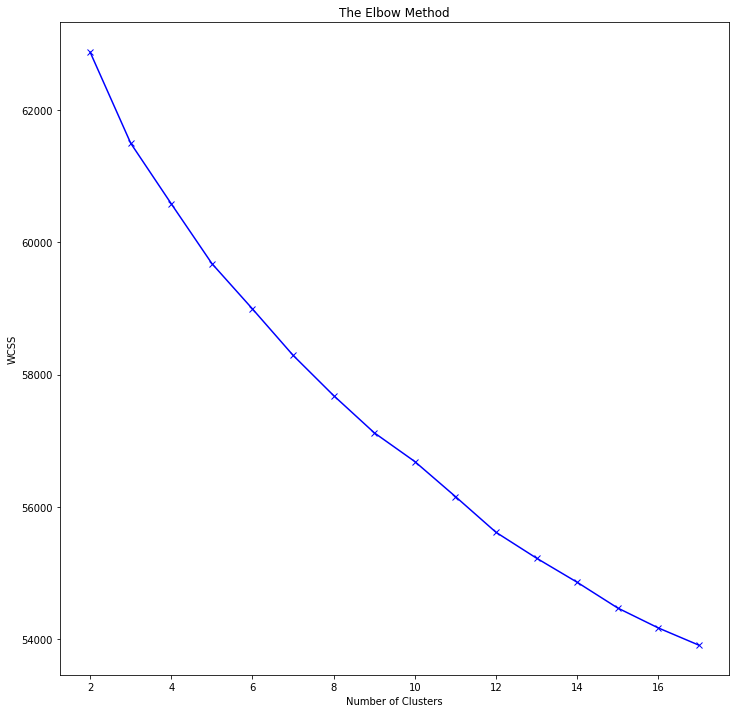

In [ ]:
plt.figure(figsize = (12,12))
plt.plot(range(2,18),wcss ,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:

# range_n_clusters = [2,3,4,5,6,7,8,10]
# data_new = data_new.to_numpy()
X = np.array(data_new)
# data_new = data_new.iloc[:,:-1].values
type(data_new)

numpy.ndarray

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# range_n_clusters = np.arange(2,18)

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax) = plt.subplots(1)
#     fig.set_size_inches(6, 6)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax.set_xlim([-1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(init = "k-means++" , n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax.set_title("The silhouette plot for the various clusters.")
#     ax.set_xlabel("The silhouette coefficient values")
#     ax.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax.set_yticks([])  # Clear the yaxis labels / ticks
#     ax.set_xticks([-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

## Optimal number of clusters from silhouette plot and elbow is n = 9

In [ ]:
kmeans = KMeans(n_clusters=9).fit(array)
centroids = kmeans.cluster_centers_
# print(centroids)
y = KMeans(n_clusters=9).fit_predict(array)


In [ ]:
df['cluster'] = y


In [ ]:
df.head()

homepage_text  cluster
0  electrician electrical contractor serve vero b...        5
1  site español elias medical home skin care acne...        6
2  home garage door repair service designadoor ga...        5
3  type size home practice service patient form c...        6
4  simply fill form back touch arrange free oblig...        5

In [ ]:
print(centroids)

[[0.0085673  0.02326929 0.01247828 ... 0.00959707 0.02325522 0.00716449]
 [0.01023019 0.00891211 0.01159608 ... 0.01335428 0.03849828 0.00904921]
 [0.00544891 0.00971666 0.01885681 ... 0.01025053 0.02373977 0.01002384]
 ...
 [0.00515295 0.00627381 0.01823391 ... 0.00634456 0.02644609 0.00576274]
 [0.00584664 0.01016374 0.00815114 ... 0.01233645 0.0241299  0.0104952 ]
 [0.00571048 0.00806457 0.01153449 ... 0.00895151 0.02817127 0.00653023]]


In [ ]:
# centroids.get_feature_names()

In [ ]:
centroids = pd.DataFrame(centroids)

In [ ]:
centroids

0         1         2    ...       382       383       384
0  0.008567  0.023269  0.012478  ...  0.009597  0.023255  0.007164
1  0.010230  0.008912  0.011596  ...  0.013354  0.038498  0.009049
2  0.005449  0.009717  0.018857  ...  0.010251  0.023740  0.010024
3  0.005982  0.009054  0.008801  ...  0.008378  0.019162  0.007667
4  0.011307  0.013371  0.036114  ...  0.017696  0.031619  0.012395
5  0.007799  0.018284  0.006503  ...  0.015141  0.029102  0.007886
6  0.005153  0.006274  0.018234  ...  0.006345  0.026446  0.005763
7  0.005847  0.010164  0.008151  ...  0.012336  0.024130  0.010495
8  0.005710  0.008065  0.011534  ...  0.008952  0.028171  0.006530

[9 rows x 385 columns]

In [ ]:
kmeans.labels_[:10]

array([1, 5, 1, 5, 0, 1, 1, 2, 1, 1], dtype=int32)

In [ ]:
labels = kmeans.labels_
cluster_df = pd.DataFrame(list(zip(df["homepage_text"],labels)),columns=['homepage_text','cluster'])

In [ ]:
cluster_df.shape

(73305, 2)

In [ ]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [ ]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [ ]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 8258,
 1: 12078,
 2: 26029,
 3: 2420,
 4: 6481,
 5: 5149,
 6: 7629,
 7: 2344,
 8: 2917}

In [ ]:
# data["cluster"] = kmeans.labels_

In [ ]:
# df.head()

In [ ]:
!apt install wordcloud

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package wordcloud


In [ ]:
from wordcloud import WordCloud

In [ ]:
# len(tfid_vectorizer.get_feature_names())

In [ ]:
tfid_vectorizer.vocabulary_

{'able': 0,
 'access': 1,
 'account': 2,
 'achieve': 3,
 'across': 4,
 'address': 5,
 'advice': 6,
 'agency': 7,
 'allow': 8,
 'also': 9,
 'always': 10,
 'application': 11,
 'apply': 12,
 'approach': 13,
 'area': 14,
 'around': 15,
 'assist': 16,
 'available': 17,
 'award': 18,
 'back': 19,
 'base': 20,
 'become': 21,
 'believe': 22,
 'benefit': 23,
 'best': 24,
 'blog': 25,
 'book': 26,
 'brand': 27,
 'bring': 28,
 'build': 29,
 'building': 30,
 'business': 31,
 'call': 32,
 'care': 33,
 'career': 34,
 'case': 35,
 'center': 36,
 'challenge': 37,
 'change': 38,
 'check': 39,
 'choice': 40,
 'choose': 41,
 'city': 42,
 'click': 43,
 'client': 44,
 'close': 45,
 'come': 46,
 'commercial': 47,
 'commit': 48,
 'communication': 49,
 'community': 50,
 'company': 51,
 'complete': 52,
 'comprehensive': 53,
 'condition': 54,
 'connect': 55,
 'construction': 56,
 'contact': 57,
 'content': 58,
 'continue': 59,
 'control': 60,
 'copyright': 61,
 'corporate': 62,
 'cost': 63,
 'cover': 64,
 'crea

In [ ]:
df_ = pd.DataFrame(array, columns=tfid_vectorizer.get_feature_names())

In [ ]:
df_.head()

able    access  account  achieve  ...  world     would      year       you
0  0.000000  0.000000      0.0      0.0  ...    0.0  0.109614  0.073978  0.000000
1  0.055541  0.000000      0.0      0.0  ...    0.0  0.000000  0.000000  0.000000
2  0.000000  0.000000      0.0      0.0  ...    0.0  0.000000  0.114430  0.038476
3  0.000000  0.105133      0.0      0.0  ...    0.0  0.099743  0.000000  0.000000
4  0.000000  0.305020      0.0      0.0  ...    0.0  0.000000  0.000000  0.000000

[5 rows x 385 columns]

In [ ]:
data = df_.T #transposing

In [ ]:
df_.T.sum(axis=1)

able        533.721234
access      850.606597
account    1214.636695
achieve     521.234068
across      694.207857
              ...     
work       2839.460242
world      1022.176962
would       823.700404
year       2016.590166
you         656.475236
Length: 385, dtype: float64

In [ ]:
centroids.T[0].sort_values(ascending = False)

316    0.188544
303    0.115569
315    0.114153
31     0.105550
298    0.100168
         ...   
106    0.004246
319    0.004243
300    0.004159
117    0.003947
179    0.003739
Name: 0, Length: 385, dtype: float64

In [ ]:
centroids

0         1         2    ...       382       383       384
0  0.008567  0.023269  0.012478  ...  0.009597  0.023255  0.007164
1  0.010230  0.008912  0.011596  ...  0.013354  0.038498  0.009049
2  0.005449  0.009717  0.018857  ...  0.010251  0.023740  0.010024
3  0.005982  0.009054  0.008801  ...  0.008378  0.019162  0.007667
4  0.011307  0.013371  0.036114  ...  0.017696  0.031619  0.012395
5  0.007799  0.018284  0.006503  ...  0.015141  0.029102  0.007886
6  0.005153  0.006274  0.018234  ...  0.006345  0.026446  0.005763
7  0.005847  0.010164  0.008151  ...  0.012336  0.024130  0.010495
8  0.005710  0.008065  0.011534  ...  0.008952  0.028171  0.006530

[9 rows x 385 columns]

In [ ]:
from collections import Counter
# 

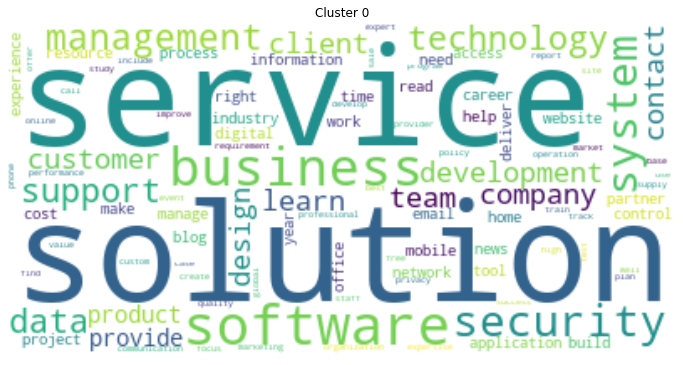

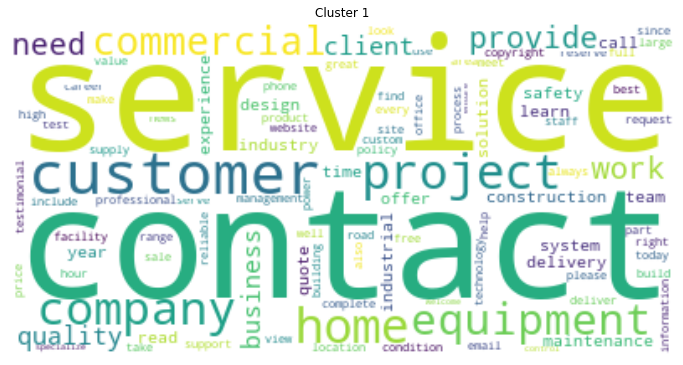

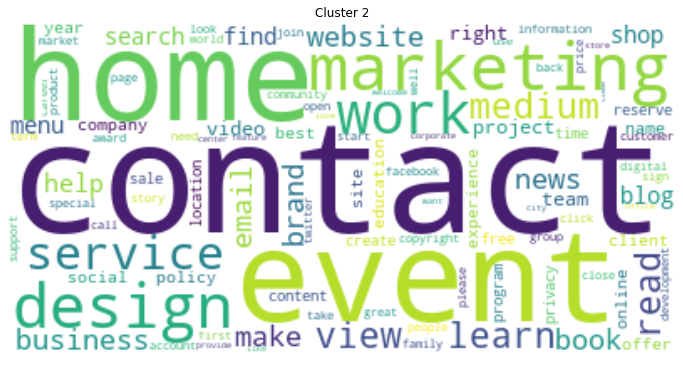

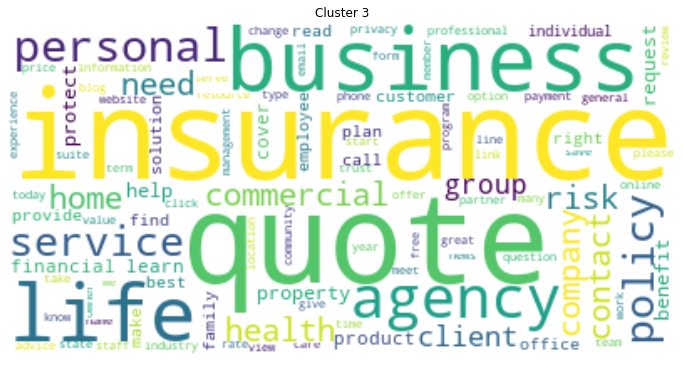

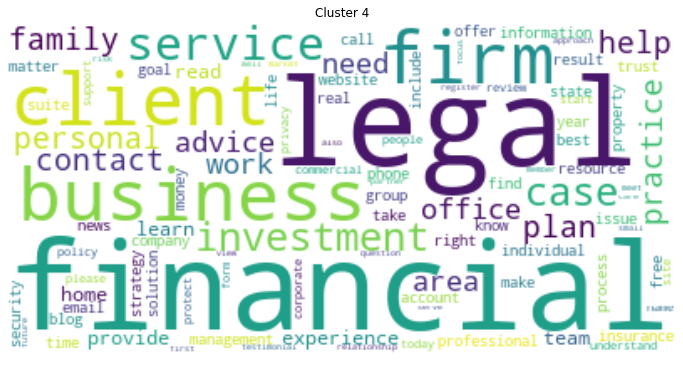

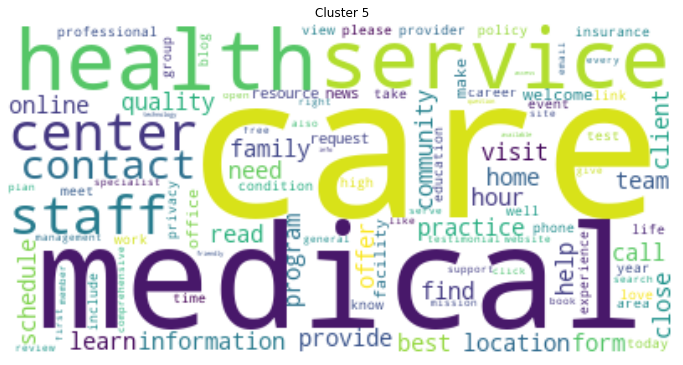

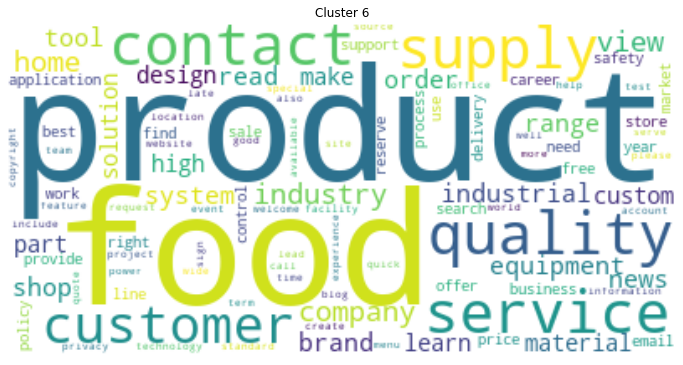

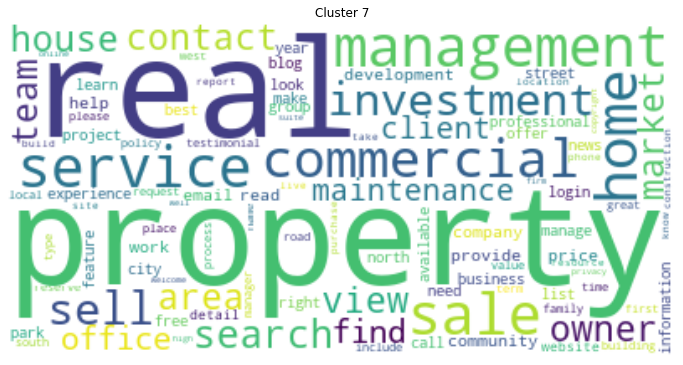

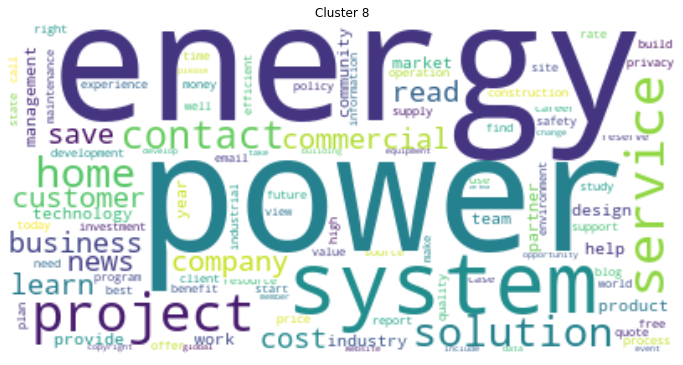

In [ ]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfid_vectorizer.get_feature_names()
# fucntion to create wordcloud
# def word_cloud(text):
#     wordcloud = WordCloud().generate(text)
#     plt.figure(figsize=(10,10))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.show()
for i in range(9):
    words = [terms[ind] for ind in order_centroids[i, :]]
    words_ = Counter(words)
    # print("Cluster {}: {}".format(i, ' '.join(words)))
    
    wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(words_)

    plt.figure(figsize = (12,12))
    plt.title('Cluster {}'.format(i))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
name_of_cluster = {0 : "Energy Resources" ,  1:"Information Technology", 2 : "Food Deliviery Services" , 3: "Real Estates " , 4: "Insurance" , 5: "Event Management" , 6: "Healthcare" , 7: "Digital Marketing" , 8:"Home Services"}

In [ ]:
df_name = pd.DataFrame(list(name_of_cluster.items()),columns = ['cluster','name_of_cluster']).sort_values(by = 'cluster')
df_name

cluster          name_of_cluster
0        0         Energy Resources
1        1   Information Technology
2        2  Food Deliviery Services
3        3            Real Estates 
4        4                Insurance
5        5         Event Management
6        6               Healthcare
7        7        Digital Marketing
8        8            Home Services

In [ ]:
# frames = [df, df_name]

# result = pd.concat(frames,axis=1)
# result = pd.merge(cluster_df, df_name,on='cluster')df["B"] = df["A"].map(equiv)
df["cluster_name"] = df["cluster"].map(name_of_cluster)


In [ ]:
df.head()

homepage_text  cluster      cluster_name
0  electrician electrical contractor serve vero b...        5  Event Management
1  site español elias medical home skin care acne...        6        Healthcare
2  home garage door repair service designadoor ga...        5  Event Management
3  type size home practice service patient form c...        6        Healthcare
4  simply fill form back touch arrange free oblig...        5  Event Management

In [ ]:
csv = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/Capstone Project/Company Classification/data_company_classification.csv')

In [ ]:
csv = csv[['website','company_name','homepage_text']].dropna()

In [ ]:
csv

website  ...                                      homepage_text
0             bipelectric.com  ...                                       Electrici...
1            eliasmedical.com  ...      site map | en español    Elias Medical   h...
2      koopsoverheaddoors.com  ...      Home  About Us  Garage Door Repair & Servi...
3             midtowneyes.com  ...                   918-599-0202        Type Size...
4         reprosecurity.co.uk  ...                  Simply fill out our form below...
...                       ...  ...                                                ...
73969          nayyarsons.com  ...                                                   
73970  claddaghcoffeecafe.com  ...                       Home    About Us    Our S...
73971    beautyologist.com.au  ...                                  03 9531 5092 M...
73972        beautycall.co.uk  ...                                                ...
73973     littleladyfoods.com  ...                                                ...

[73305 rows x 3 columns]

In [ ]:
d = {}

In [ ]:
for i in range(9):
  df_[df['cluster']==i].sample(10)
  d[i] = df_


In [ ]:
df["cluster_name"].value_counts()


Real Estates               23966
Event Management           18305
Information Technology      8172
Digital Marketing           6520
Healthcare                  5128
Food Deliviery Services     3518
Home Services               2940
Energy Resources            2420
Insurance                   2336
Name: cluster_name, dtype: int64

In [ ]:
df["cluster_name"].value_counts().index


Index(['Real Estates ', 'Event Management', 'Information Technology',
       'Digital Marketing', 'Healthcare', 'Food Deliviery Services',
       'Home Services', 'Energy Resources', 'Insurance'],
      dtype='object')

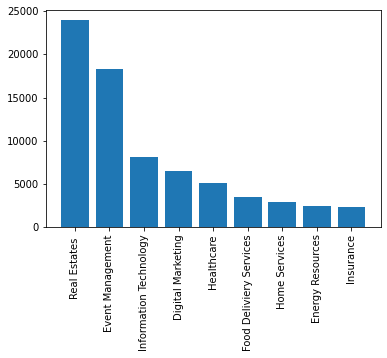

In [ ]:
plt.xticks(rotation=90)
plt.bar(list(df['cluster_name'].value_counts().index), list(df['cluster_name'].value_counts().values))
plt.show()

In [ ]:
df.shape

(73305, 3)

In [ ]:
df.isnull().sum()

homepage_text    0
cluster          0
cluster_name     0
dtype: int64

## Word2vec vectorizer 

In [ ]:
pip install beautifulsoup4


In [ ]:
pip install gensim 

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

In [ ]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['homepage_text']), axis=1)


In [ ]:
df.head()

homepage_text  ...                                    tokenized_sents
0  electrician electrical contractor serve vero b...  ...  [electrician, electrical, contractor, serve, v...
1  site español elias medical home skin care acne...  ...  [site, español, elias, medical, home, skin, ca...
2  home garage door repair service designadoor ga...  ...  [home, garage, door, repair, service, designad...
3  type size home practice service patient form c...  ...  [type, size, home, practice, service, patient,...
4  simply fill form back touch arrange free oblig...  ...  [simply, fill, form, back, touch, arrange, fre...

[5 rows x 4 columns]

In [ ]:
# text = df['homepage_text'].values

In [ ]:
model = Word2Vec(df['tokenized_sents'].values, workers=1)

In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [ ]:
# vectorized_docs.vocab

In [ ]:
vectorized_docs = vectorize(df['tokenized_sents'].values, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(73305, 100)

In [ ]:
X = model[model.wv.vocab]
Y = model.wv.syn0;


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [ ]:
X

array([[ 6.17434504e-03,  7.14415252e-01,  2.02764988e+00, ...,
        -1.36837375e+00,  7.16373026e-01,  2.01826334e+00],
       [-8.72317478e-02, -5.80355346e-01,  8.70356917e-01, ...,
        -2.58136511e+00, -2.43993306e+00,  1.34519684e+00],
       [-7.73689270e-01,  1.91946447e-01,  2.71334071e-02, ...,
         1.43014002e+00, -2.29577041e+00,  2.49724817e+00],
       ...,
       [ 3.85951735e-02, -6.57252520e-02,  9.83366519e-02, ...,
        -3.55739184e-02,  6.84173256e-02, -1.05832025e-01],
       [ 8.54103640e-02, -4.58686128e-02, -5.93490861e-02, ...,
        -4.98688631e-02,  1.48776457e-01, -2.31642351e-02],
       [ 5.82879633e-02, -2.27206992e-03,  6.14914857e-02, ...,
         2.18557436e-02,  1.57157890e-02,  2.47550607e-02]], dtype=float32)

In [ ]:
Y

array([[-2.61425090e+00, -1.46116877e+00,  5.55236414e-02, ...,
        -1.76332617e+00, -2.71414542e+00,  1.43892670e+00],
       [ 1.03715606e-01, -1.47100735e+00, -8.17897692e-02, ...,
         6.88106894e-01, -1.73274386e+00, -1.78207532e-01],
       [-2.83344460e+00, -7.98758343e-02,  1.15949905e+00, ...,
         2.39072099e-01, -2.32566535e-01,  2.32675123e+00],
       ...,
       [ 9.32761058e-02, -5.95722310e-02,  6.71014562e-02, ...,
         4.40719202e-02,  9.91202891e-02,  9.53776937e-04],
       [-2.48630997e-03, -1.34200118e-02,  4.77550970e-03, ...,
         8.15926269e-02, -4.41959947e-02, -6.72022030e-02],
       [ 1.73153225e-02, -9.60426182e-02,  4.14173631e-03, ...,
         2.34273765e-02,  5.67479432e-02,  1.12233004e-02]], dtype=float32)

In [ ]:

wcss=[]
for i in range(2,18):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(vectorized_docs)
    wcss.append(kmeans.inertia_)


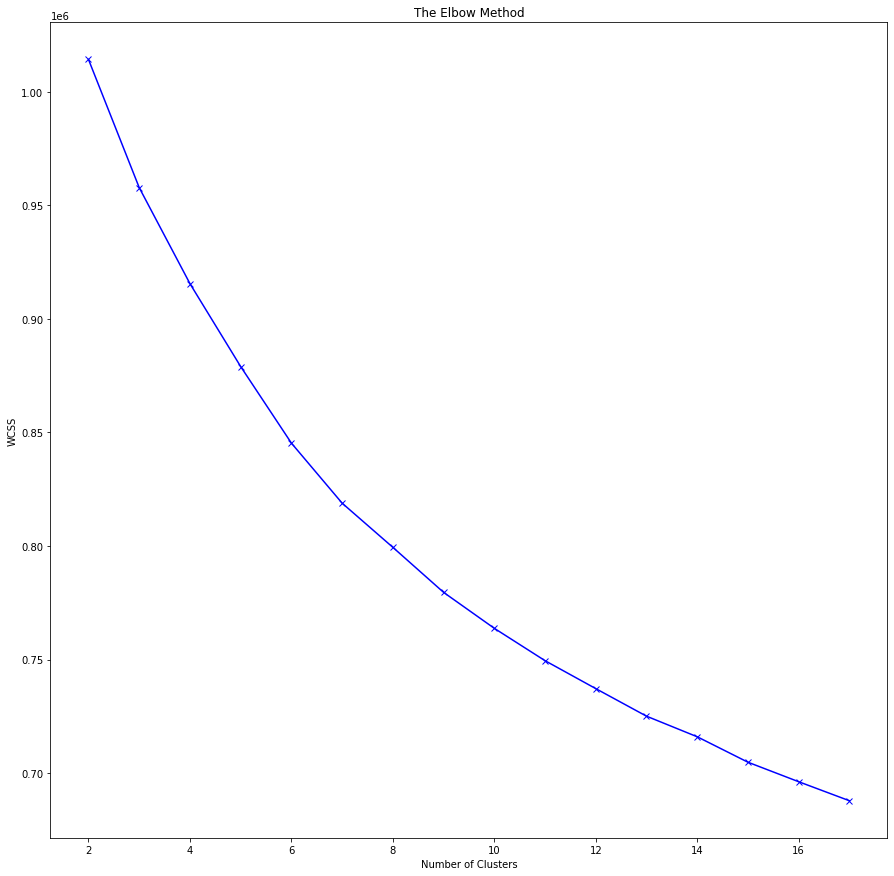

In [ ]:
plt.figure(figsize = (15,15))
plt.plot(range(2,18),wcss ,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Optimal number of clusters from elbow curve is n = 7

In [ ]:
kmeans = KMeans(n_clusters=7).fit(vectorized_docs)
centroids = kmeans.cluster_centers_
# print(centroids)

In [ ]:
# print(centroids)

In [ ]:
centroids = pd.DataFrame(centroids)

In [ ]:
model.vocabulary

In [ ]:
# ssss = model[model.vocab]

In [ ]:
kmeans.labels_[:10]

array([4, 6, 5, 6, 5, 5, 5, 6, 5, 5], dtype=int32)

In [ ]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [ ]:
unique

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [ ]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 6930, 1: 10956, 2: 18198, 3: 2267, 4: 13239, 5: 14798, 6: 6917}

In [ ]:
z =  model.wv.index2word

In [ ]:
len(model.wv.vocab)


105590

In [ ]:
len(z)

105590

In [ ]:
print(z)

['service', 'contact', 'business', 'home', 'work', 'insurance', 'product', 's', 'company', 'help', 'provide', 'need', 'read', 'solution', 'client', 'team', 'learn', 'make', 'customer', 'design', 'year', 'management', 'experience', 'time', 'care', 'view', 'offer', 'find', 'right', 'email', 'system', 'best', 'support', 'news', 'call', 'information', 'project', 'policy', 'property', 'website', 'office', 'industry', 'event', 'professional', 'quality', 'energy', 'free', 'take', 'blog', 'well', 'include', 'search', 'online', 'great', 'health', 'privacy', 'technology', 'commercial', 'family', 'process', 'site', 'market', 'plan', 'development', 'high', 'financial', 'sale', 'marketing', 'know', 'use', 'look', 'career', 'area', 'location', 'also', 'first', 'medical', 'resource', 'solar', 'partner', 'please', 'program', 'today', 'staff', 'name', 'security', 'medium', 'phone', 'life', 'personal', 'group', 'price', 'quote', 'term', 'people', 'center', 'power', 'every', 'data', 'start', 'request', '

In [ ]:
w = model.wv

In [ ]:
# print(w)

In [ ]:
from collections import Counter
# kmeans.cluster_labels_

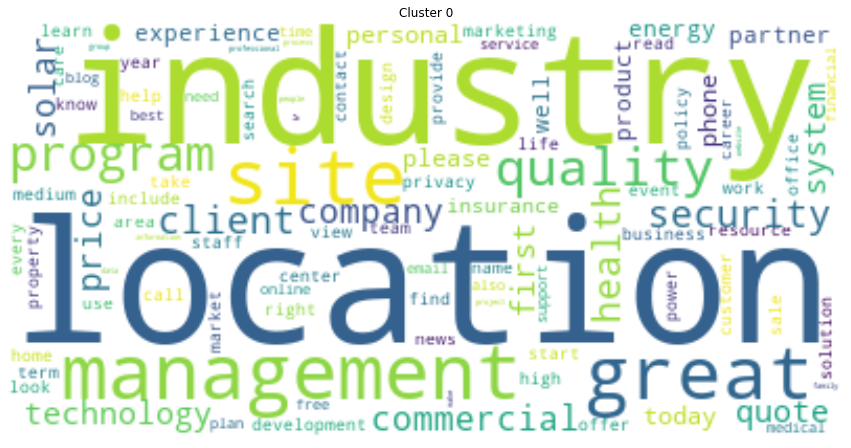

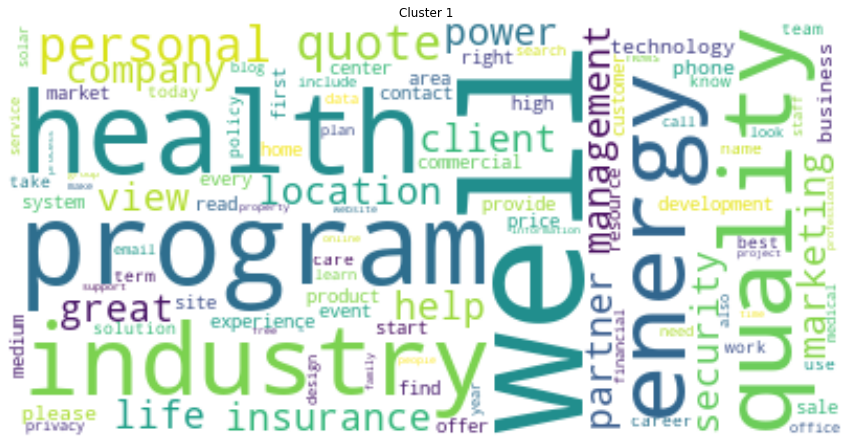

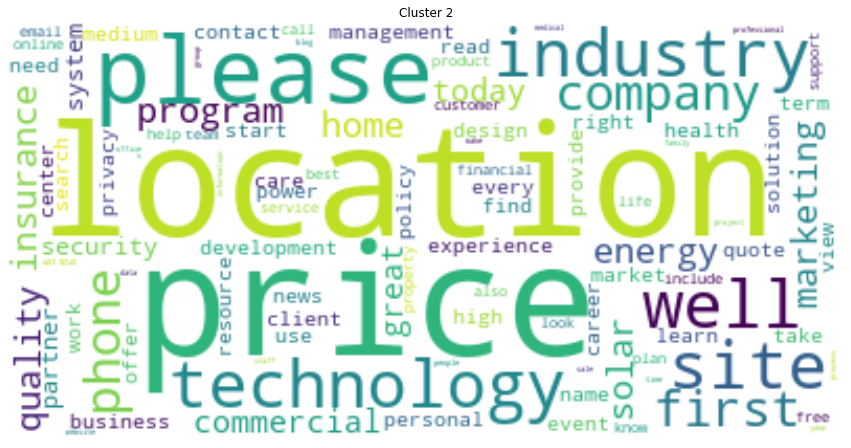

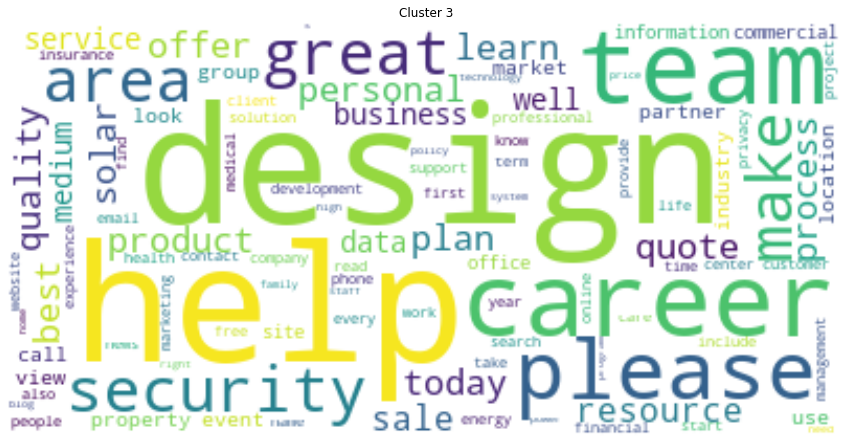

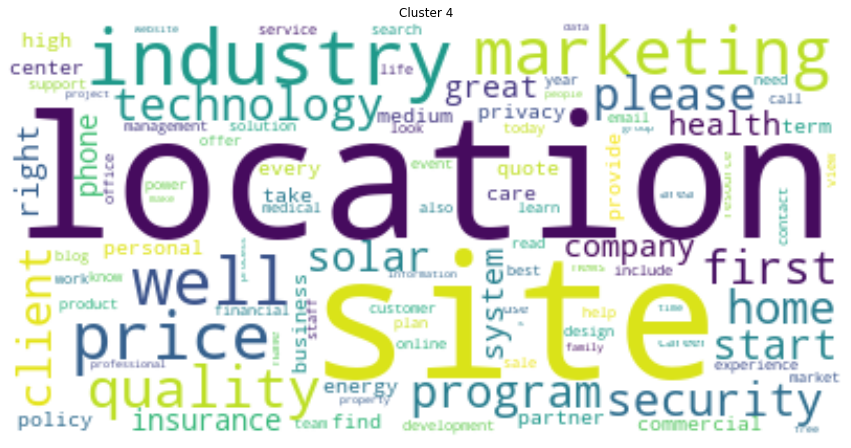

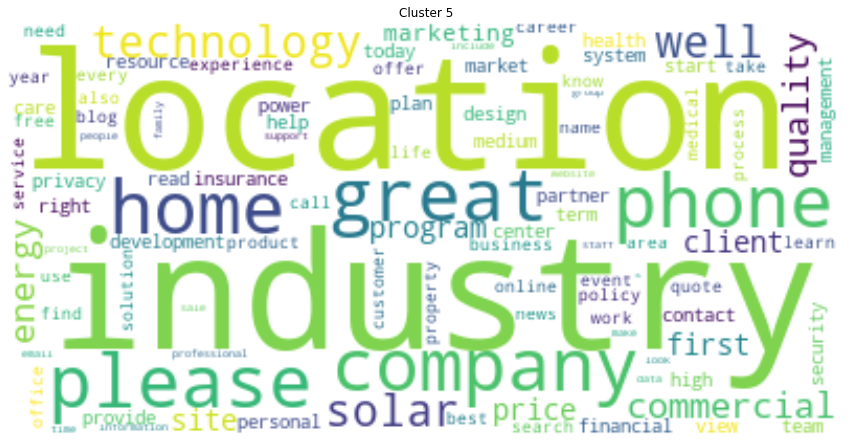

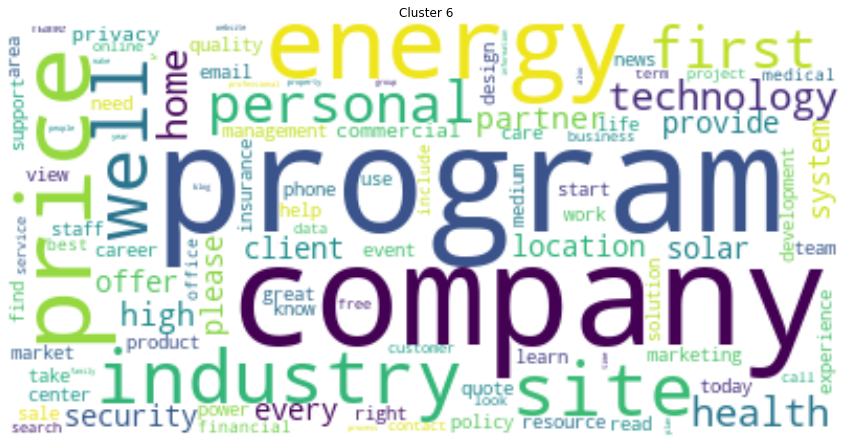

In [ ]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# z = tfid_vectorizer.get_feature_names()
for i in range(7):
    words = [z[ind] for ind in order_centroids[i, :]]
    words_ = Counter(words)
    # print("Cluster {}: {}".format(i, ' '.join(words)))
    
    wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(words_)

    plt.figure(figsize = (15,15))
    plt.title('Cluster {}'.format(i))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()